In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
tickers = ['VXX', 'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AMD', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX','CMI','CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DUK', 'DRE', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'RE', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JEC', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SCG', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'BK', 'CLX', 'COO', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRIP', 'FOXA', 'FOX', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']


IndexError: index 0 is out of bounds for axis 0 with size 0

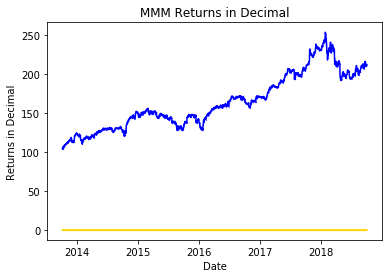

In [9]:
for i in tickers[1:4]:
    #grabbing data
    ticker = pd.read_excel('data/worksheet_of_em_all.xlsx', sheet_name = i)
    #setting dates
    dates = pd.to_datetime(ticker.date)
    ticker["date"] = dates
    #plot of price
    plt.plot_date(ticker.date, ticker.close,  ls = 'solid', ms = .2, color = 'blue')
    plt.title(i)
    plt.xlabel("Date")
    plt.ylabel("Price in Dollars")
    pchartimgfilename = ('images/' + i + '/pricechart.png')
    plt.savefig(pchartimgfilename)
    #plot of returns 
    ticker['returns'] = ticker.open/ticker.close -1
    plt.plot_date(ticker.date, ticker.returns, ls = 'solid', ms = .15, color = 'gold')
    plt.title(i + " Returns in Decimal")
    plt.ylabel("Returns in Decimal")
    plt.xlabel("Date")
    returnsimgfilename = ('images/' + i + '/returnschart.png')
    plt.savefig(returnsimgfilename)
    #sorting returns, dropping/resetting the index for merging purposes
    ticker_sorted_returns = ticker['returns'].sort_values().reset_index(drop = True)         
    #bootstrappily making cdf
    ticker_cdf = np.arange(len(ticker_sorted_returns) + 1)/len(ticker_sorted_returns)
    #ordering the probability of a particular return, getting cdf
    ticker_true_cdf = []
    for i in np.arange(len(ticker_cdf)):
        if ticker_sorted_returns[i] <= 0:
            ticker_true_cdf += ticker_sorted_returns[i]
            if i == 0:
                #taking the most unlikely event and saying that it's equally unlikely as the highest upswing
                ticker_true_cdf[i] = ticker_true_cdf[i]/2
        else: 
            ticker_true_cdf += [1 -  ticker_cdf[i]]
            if ticker_true_cdf[i] == 0:
                #this is what the earlier weird if statment was getting at
                ticker_true_cdf[i] = ticker_true_cdf[0]
    ticker_distributed_returns = pd.DataFrame({'sorted': ticker_sorted_returns, 
                                              'cdf': ticker_true_cdf})
    #looking at the log of the chances of things
    plt.plot(vxx_distributed_returns.returns, vxx_distributed_returns.true_cdf, 'bo')
    plt.yscale('log')
    plt.title(i + 'Logarized Returns')
    plt.ylabel('Log CDF')
    plt.xlabel('Returns')
    logarizedimgfilename = ('images/' + i + '/logarizedchart.png')
    plt.savefig(logarizedimgfilename)
    #looking at the big log log power law returns
    ticker_norm = (ticker_distributed_returns.returns - np.mean(ticker_distributed_returns.returns))/np.std(ticker_distributed_returns.returns)
    ticker_norm_above = abs(ticker_norm[abs(norm_ticker) > abover])
    ticker_log_return = np.log(ticker_distributed_returns.true_cdf)
    ticker_log_above =  ticker_log[abs(norm_ticker) > abover]
    ###vxx_norm_above == t_norm_x, vxx_log_above == dvariable (this all references earlier code)
    plt.scatter(ticker_norm_above, ticker_log_above)
    plt.title(i + "Log Log Big Returns")
    plt.xlabel("Log Normalized Returns)")
    plt.ylabel("Log CDF")
    plt.plot(np.unique(vxx_norm_above), np.poly1d(np.polyfit(vxx_norm_above, vxx_log_above, 1))(np.unique(vxx_norm_above)), color = 'red')
    bigloglogimgfilename = ('images/' + i + '/bigloglogchart.png')
    plt.savefig(bigloglogimgfilename)